# Spectral Clustering

## 1.  Introduction

Spectral clustering has become a prevailing partitional clustering method in recent decades. It derives from the graph theory and aims to map data into low-dimensional space for clustering by using the spectrum (eigenvalues) of the similarity matrix of data. Spectral clustering treats all the data points as nodes in a graph which can be linked by edges. The weight of an edge will be relatively small if two nodes are far away from each other while the weight of the edge will be relatively large if these nodes are near to each other. The goal of spectral clustering is to cut the graph in a way that **minimizes the sum of weights of edges in the same subgraphs** (0.1+0.2 as shown below) or **maximizes the sum of weights of edges between different subgraphs** (cluster A: 0.8+0.8+0.6; cluster B: 0.8+0.8+0.7 as shown below). 


<img src="1.png" alt="Drawing" style="width: 600px;"/>

Compared to other clusterings, such as k-means, spectral clustering has many fundamental advantages:
* does not make strong assumptions on the data (eg. k-means requires the data to be convex sets; GMM makes assumptions on the distributions of the data);
* faster on bigger data sets for its sparse similarity graphs;
* avoids separate and small clusterings like k-means would deliver because it cuts graphs.

Meanwhile, spectral clustering has its disadvantages:
* sensitive to different similarity graphs;
* sensitive to the choice of parameters.

Therefore, it is important to understand the concepts, logics, and algorithms of spectral clustering so that we can make the best choice of the method during clustering in terms of performance and efficiency. This tutorial will introduce you how spectral clustering works (Section 2, 3, and 4), its algorithm, and its application in datasets (Section 5). If you are interested, Section 6 lists resources for further readings.

## 2. Graph Construction

As we have mentioned in Introduction, spectral clustering treats all data points as nodes in a graph. Thus, the first step is to construct a graph which consists of nodes, edges, and weights based on the data set. The nodes are obvious - data points. The problem is to find the edges and the weights among nodes. Intuitively, two nodes that are "similar" to each other should have an edge with a large weight and those that are not "similar" should have an edge with small weight or even no edge between. Then, the graph construction is simplified as constructing a similarity matrix  $S$ where $ s_i,_j $ is the similarity of data point $i$ and $j$. Here, the similarity is represented by the distance of two data points. Usually, we use Euclidean distance:$s_i,_j=∥xi−xj∥^2$ , or Gaussian distance: $s_i,_j=e^{\frac{−∥xi−xj∥^2} {2σ^2}}$.
### 2.1 Adjacency Matrix (W)
Based on the similarity matrix, we can build the adjacency matrix $W$ where $ w_i,_j $ is the weight of edge of data point $i$ and $j$. There are three ways to build the adjacency matrix:
- ε-neighborhood: only assigns weight ε to the points whose distance is smaller than ε 
\begin{align} W_{i,j}=\left\{\begin{matrix}
0,\quad if \quad s_{i,j}>\varepsilon\\ 
\varepsilon,\quad if \quad s_{i,j}\leq \varepsilon
\end{matrix}\right. \end{align}
- k-nearest neighborhood: uses kNN algorithm to search through all the data points and takes the k nearest data points as neighbors. However, this method will result in an asymmetric matrix. There are two ways to solve this problem: (1) keep the similarity as long as one data point is one of the k nearest neighbors of another data points: \begin{align} W_{i,j}=W_{j,i}=\left\{\begin{matrix} 0,\quad if \quad x_{i}\notin KNN(X_{j}) \quad and \quad x_{j}\notin KNN(X_{i})\\ e^{\frac{-\left \| x_{i}-x_{j} \right \|^{2}}{2\sigma ^{2}}}, \quad if \quad x_{i}\in  KNN(X_{j}) \quad or \quad x_{j}\in KNN(X_{i})\end{matrix}\right. \end{align} 
    (2) keep the similarity only if the two data points are one of the k nearest neighbors to each other: 
\begin{align} W_{i,j}=W_{j,i}=\left\{\begin{matrix}
0,\quad if \quad x_{i}\notin KNN(X_{j}) \quad  or \quad x_{j}\notin KNN(X_{i})\\ 
e^{\frac{-\left \| x_{i}-x_{j} \right \|^{2}}{2\sigma ^{2}}}, \quad if \quad x_{i}\in  KNN(X_{j}) \quad and \quad x_{j}\in KNN(X_{i})
\end{matrix}\right. \end{align}

- fully connected: usually uses Gaussian distance: $s_i,_j=e^{\frac{−∥xi−xj∥^2} {2σ^2}}$, which naturally assigns larger weights to the data points with smaller distance. Thus, the adjacency matrix is just the same as the similarity matrix.

### 2.2 Degree Matrix (D)
Based on the adjacency matrix W, we can compute degree matrix D, which is a diagonal matrix: 
\begin{align} D_{i,j}=\left\{\begin{matrix}
0,\quad if \quad i \neq  j\\ 
\sum_{j}w_{i,j},\quad if \quad i = j
\end{matrix}\right. \end{align}

### 2.3 Laplacians Matrix (L)
Laplacians Matrix $L = D - W$. It is a simply defined matrix while its propositions are vital to the spectral clustering algorithm:
- symmetric, and thus all its eigenvalues are real-valued;
- For every vector 
$f ∈ R^n$ we have 

\begin{align} f^TLf = \frac{1}{2}\sum\limits_{i,j=1}^{n}w_{ij}(f_i-f_j)^2 \end{align}

- positive semi-deﬁnite and the smallest eigenvalue is 0.

## 3. Graph Cut

Now we have constructed the graph and are ready to cut the graph for clustering. 

Suppose we aim to cut the graph $G(V, E)$ to k subgraphs and each subgraph is $A_1,A_2,⋯,A_k$, where $A_i ∩ A_j = ∅$ and $A_1 ∪ A_2 ∪ ... ∪ A_k = V$. Thus, the sum of weights of edges among subgraphs is: 

\begin{align} cut(A_{1},A_{2},\cdots,A_{k})=\frac{1}{2}\sum_{i}^{k}W(A_{i},\bar{A_{i}}) \end{align}

where $\bar{A_{i}}$ is the complement set of $A_i$, and $W(Ai,\bar{A_{i}})$ is the sum of weights of edges between $A$ and other subgraphs: 

\begin{align} W(A_{i},\bar{A_{i}})=\sum_{m\in A_{i},n \in \bar{A_{i}}}w_{m,n} \end{align}

Recall that our goal is to minimizes the sum of weights of edges in the same subgraphs, *min* $cut
(A_1, A_2, ⋯, A_k)$, which could lead to a problem where V is cutted into subgraphs of single data point (as shown below):
<img src="11.png" alt="Drawing" style="width: 200px;"/>
To solve this problem, we usually use two methods to cut the graph: RatioCut and Ncut.

### 3.1 RatioCut
RatioCut takes the size of subgraphs into consideration to avoid the problem:

\begin{align} RatioCut(A_1,A_2,...A_k) = \frac{1}{2}\sum\limits_{i=1}^{k}\frac{W(A_i, \overline{A}_i )}{|A_i|} \end{align}

where $|A_i|$ is the number of data points in $A_i$. To minimize $Ratiocut(A_1, A_2, ..., A_k)$, we introduce the vector $h_j =\{h_1, h_2,..h_k\}\; j =1,2,...k$ to represent $Ratiocut(A_1, A_2, ..., A_k)$. Each vector $h_j$ is a n-dimentional (n is the number of data points) and $h_{ji}= \begin{cases} 0& { v_i \notin A_j}\\ \frac{1}{\sqrt{|A_j|}}& { v_i \in A_j} \end{cases}$. Then, using the proposition of Laplacians matrix, we have:

\begin{align} h_i^TLh_i & = \frac{1}{2}\sum\limits_{m=1}\sum\limits_{n=1}w_{mn}(h_{im}-h_{in})^2 \\& = \frac{cut(A_i, \bar{A}_i)}{|A_i|} \\& = RatioCut(A_i, \overline{A}_i) \end{align}

Thus, the objective function can be represented as: 

\begin{align} RatioCut(A_1,A_2,...A_k) = \sum\limits_{i=1}^{k}h_i^TLh_i = \sum\limits_{i=1}^{k}(H^TLH)_{ii} = tr(H^TLH)\end{align}

To minimize $RatioCut(A_1,A_2,...A_k)$ is to minimize $tr(H^TLH)$. Since $H^TH=I$,the goal now is: 

\begin{align} \underbrace{arg\;min}_H\; tr(H^TLH) \;\; s.t.\;H^TH=I \end{align}

Since each element in $H$ can take two possible values, finding the best $H$ becomes an NP-hard problem. However, we can relax the problem by computing the k smallest eigenvalues so that we have k eigenvectors which add up to the $H$ we look for. After normalization, we have the optimal $H$:
\begin{align} h_{ij}^{*}= \frac{h_{ij}}{(\sum\limits_{t=1}^kh_{it}^{2})^{1/2}} \end{align}
### 3.2 Ncut
Ncut is similar to RatioCut except that it uses $vol(A_i)$, the sum of weights of edges in $A_i$, instead of $|A_i|$:
\begin{align} NCut(A_1,A_2,...A_k) = \frac{1}{2}\sum\limits_{i=1}^{k}\frac{W(A_i, \overline{A}_i )}{vol(A_i)} \end{align}
Accordingly, Ncut makes changes to $h$:
\begin{align} h_{ji}= \begin{cases} 0& { v_i \notin A_j}\\ \frac{1}{\sqrt{vol(A_j)}}& { v_i \in A_j} \end{cases} \end{align}
Similarily, we have:
\begin{align} h_i^TLh_i & = \frac{1}{2}\sum\limits_{m=1}\sum\limits_{n=1}w_{mn}(h_{im}-h_{in})^2 \\& = \frac{1}{2}(cut(A_i, \overline{A}_i) \frac{1}{vol(A_j)} + cut(\overline{A}_i, A_i) \frac{1}{vol(A_j)}) \\& =  \frac{cut(A_i, \overline{A}_i)}{vol(A_j)} \\& = NCut(A_i, \overline{A}_i) \end{align}
and thus, the objective function can be represented as:
\begin{align} NCut(A_1,A_2,...A_k) = \sum\limits_{i=1}^{k}h_i^TLh_i = \sum\limits_{i=1}^{k}(H^TLH)_{ii} = tr(H^TLH) \end{align}
Notice that now $H^TH \neq I$ but rather $H^TDH = I$. So we make a small transformation to $H$, let $H = D^{-1/2}F$, then the goal becomes:
\begin{align} \underbrace{arg\;min}_F\; tr(F^TD^{-1/2}LD^{-1/2}F) \;\; s.t.\;F^TF=I \end{align}
This is almost the same as the goal of RatioCut except that $L$ changes to $D^{-1/2}LD^{-1/2}$. The idea to solve the objective function is just the same as the idea we have discussed in RatioCut: we can relax the problem by computing the k smallest eigenvalues of $D^{-1/2}LD^{-1/2}$ and computing the eigenvectors. After normalization, we have the optimal $F$:
\begin{align} F_{i,j}^{*}=\frac{F_{i,j}}{(\sum_{j=1}^{k}F_{i,j}^{2})^{1/2}} \end{align}


## 4. Clustering
Since we relax the problem above, we lose some information when we construct $H$ or $F$. The elements of $H$ or $F$ are no longer binary and cannot indicate which subgraph a certain data point belongs to. Therefore, the final step of spectral clustering is to use traditional clustering methods such as k-means and GMM to cluster the rows of $H$ or $F$.  

## 5. Algorithm and Application

### 5.1 Pseudo-code
Based on the graph construction and cut we have discussed above, we can develope the pseudo-code for spectral clustering algorithm. We will be using the k-nearest neighborhood method to construct a graph. Since the sklearn package in python adopts Ncut method, we will be using this method to cut the graph. In the end, we will be using kmeans method to cluster the data. The pseudo-code is shown as below:

> input: (data, k1, k2, kNNType, sigma) 
><font color='green'>*k1 is the target for dimensionality reduction, k2 is the number of clusterings*</font>

>1. S = Euclidean(data)  
><font color='green'>*construct the similarity matrix*</font>

>2. W = Gaussian(kNN(S, k1, kNNType), sigma)   
><font color='green'>*construct the adjacency matrix based on S using kNN method*</font>

>3. L = D - W 
><font color='green'>*construct the Laplacians matrix*</font>

>4. L' = normalized(L)
  
>5. EV = eigenvector(L', k1)
><font color='green'>*take the eigenvectors corresponding to the k1 smallest eigenvalues of L'*</font>
 
>6. newCenter = kmeans(EV, k2)
><font color='green'>*use kmeans clustering method on EV by row*</font>
 
> output：k2 clusters of data

### 5.2 Application 

For simplicity's sake, we will be using the spectral clustering from the sklearn package in python to give you a taste of how it works and outperforms the traditional clustering methods. Specifically, we will generate four small datasets, fit kmeans, GMM, and spectral clustering models on each dataset, and visualize the results.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import scale

In [37]:
# ============
# Generate 4 datasets. 
# Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
# ============
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

(1) We will be fitting these models on the first dataset. From the results below, we can see that spectral clustering is much better than k-means and GMM models, implying that spectral clustering does well on non-linear data.

In [89]:
# ============
# Construct spectral clustering, k-means, and GMM models on the first dataset.
# ============
X,y = noisy_circles

# standardize features
X = scale(X)

# build kmeans model
kmeans = cluster.KMeans(n_clusters=2, 
                        random_state=0)
kmeans.fit(X) # fit the model on dataset
y_pred_kmeans = kmeans.labels_ # predict the labels of data points using kmeans model trained above

# build GMM model
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X) # fit the model on dataset
y_pred_gmm = gmm.predict(X) # predict the labels of data points using GMM model trained above

# build spectral clustering model
spectral = cluster.SpectralClustering(
           n_clusters=2, eigen_solver='arpack',
           affinity="nearest_neighbors")
spectral.fit(X) # fit the model on dataset
y_pred_spectral = spectral.labels_ # predict the labels of data points using spectral clustering model trained above

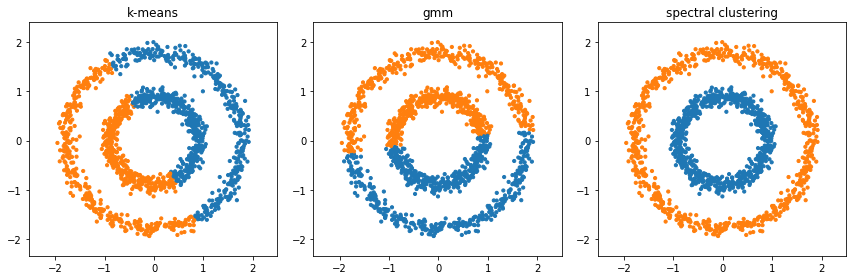

In [84]:
# ============
# Plot the clustering results and compare them.
# ============
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_kmeans]])
plt.axis('equal')
plt.title('k-means')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_gmm]])
plt.axis('equal')
plt.title('gmm')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral]])
plt.axis('equal')
plt.title('spectral clustering')

plt.tight_layout()
plt.show()

(2) We will be fitting these models on the second dataset. From the results below, we can see that spectral clustering also does better than k-means and GMM models.

In [81]:
# ============
# Construct spectral clustering, k-means, and GMM models on the second data set.
# ============
X,y = noisy_moons

# standardize features
X = scale(X)

kmeans = cluster.KMeans(n_clusters=2, 
                        random_state=0)
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X)
y_pred_gmm = gmm.predict(X)

spectral = cluster.SpectralClustering(
           n_clusters=2, eigen_solver='arpack',
           affinity="nearest_neighbors")
spectral.fit(X)
y_pred_spectral = spectral.labels_

C:\Users\livvvv_wang\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


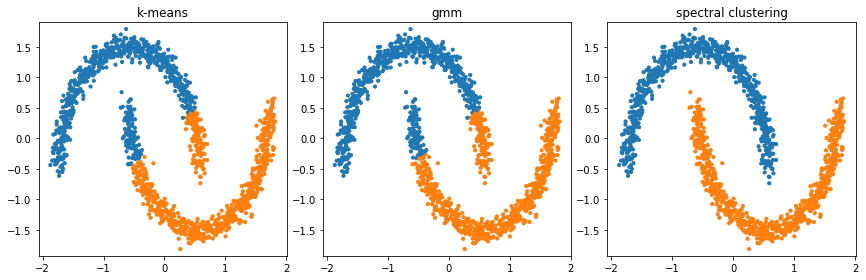

In [82]:
# ============
# Plot the clustering results and compare them.
# ============
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_kmeans]])
plt.axis('equal')
plt.title('k-means')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_gmm]])
plt.axis('equal')
plt.title('gmm')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral]])
plt.axis('equal')
plt.title('spectral clustering')

plt.tight_layout()
plt.show()

(3) We will be fitting these models on the third dataset. From the results below, we can see that spectral clustering is  better than k-means but slight worse than GMM model.

In [79]:
# ============
# Construct spectral clustering, k-means, and GMM models on the third data set.
# ============
X,y = aniso

# standardize features
X = scale(X)

kmeans = cluster.KMeans(n_clusters=3, 
                        random_state=0)
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_

gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)
y_pred_gmm = gmm.predict(X)

spectral = cluster.SpectralClustering(
           n_clusters=3, eigen_solver='arpack',
           affinity="nearest_neighbors")
spectral.fit(X)
y_pred_spectral = spectral.labels_

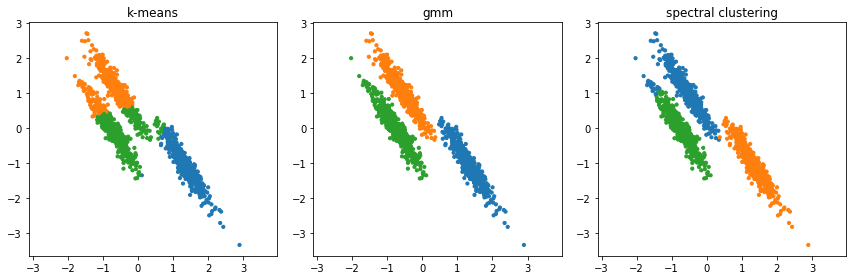

In [80]:
# ============
# Plot the clustering results and compare them.
# ============
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_kmeans]])
plt.axis('equal')
plt.title('k-means')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_gmm]])
plt.axis('equal')
plt.title('gmm')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral]])
plt.axis('equal')
plt.title('spectral clustering')

plt.tight_layout()
plt.show()

(4) We will be fitting these models on the fourth dataset. From the results below, we can see that spectral and GMM are almost doing the same and both are better than k-means.

In [91]:
# ============
# Construct spectral clustering, k-means, and GMM models on the fourth dataset.
# ============
X,y = varied

# standardize features
X = scale(X)

kmeans = cluster.KMeans(n_clusters=3, 
                        random_state=0)
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_

gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)
y_pred_gmm = gmm.predict(X)

spectral = cluster.SpectralClustering(
           n_clusters=3, eigen_solver='arpack',
           affinity="nearest_neighbors")
spectral.fit(X)
y_pred_spectral = spectral.labels_

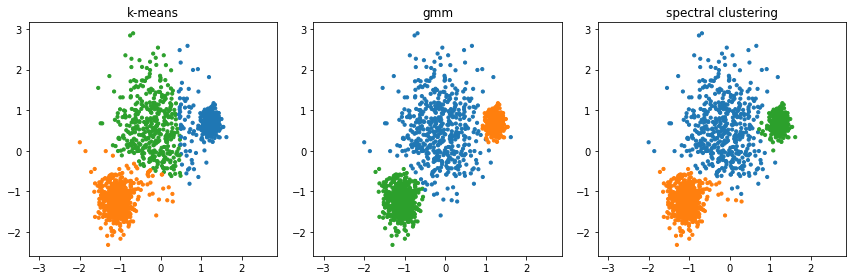

In [88]:
# ============
# Plot the clustering results and compare them.
# ============
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_kmeans]])
plt.axis('equal')
plt.title('k-means')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_gmm]])
plt.axis('equal')
plt.title('gmm')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral]])
plt.axis('equal')
plt.title('spectral clustering')

plt.tight_layout()
plt.show()

Meanwhile, spectral clustering is sensitive to the choice of parameters. For example, choosing different numbers of neighbors when building the adjacency matrix could lead to quite different clustering results. Therefore, we should carefully choose the right parameters for spectral clustering in practice.

C:\Users\livvvv_wang\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


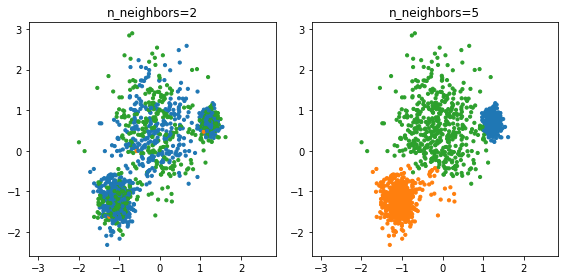

In [96]:
# ============
# Construct differenet spectral clustering models with different numbers of neighbors when building the adjacency matrix.
# ============
spectral_1 = cluster.SpectralClustering(
           n_clusters=3, eigen_solver='arpack',
           affinity="nearest_neighbors", n_neighbors=2)
spectral_1.fit(X)
y_pred_spectral_1 = spectral_1.labels_

spectral_2 = cluster.SpectralClustering(
           n_clusters=3, eigen_solver='arpack',
           affinity="nearest_neighbors", n_neighbors=5)
spectral_2.fit(X)
y_pred_spectral_2 = spectral_2.labels_

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral_1]])
plt.axis('equal')
plt.title('n_neighbors=2')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=10, color=['C'+str(x) for x in [i for i in y_pred_spectral_2]])
plt.axis('equal')
plt.title('n_neighbors=5')

plt.tight_layout()
plt.show()

## 6. Summary and Sources

From the calculations and applications above, spectral clustering demonstrates its advantages in terms of weak assumptions, easy implementation, and good clustering results, especially compared to traditional clustering methods. Due to the limit of words, this tutorial does not dive into the mathematical proof of RatioCut and Ncut. If you would like to know more about this aspect or spectral clustering itself, there are many readings, some of which are also the resources of this tutorial:
- Meila,Shi: A Random Walks View of Spectral Segmentation
- Ulrike von Luxburg: A Tutorial on Spectral Clustering
- Andrew Y.Ng, Michael I.Jordan, Yair Weiss: On Spectral Clustering Analysis and an algorithm
- L. LOVASZ: Random Walks on Graphs: A Survey
- Fan R.K. Chung: Spectral Graph Theory
- Xiao-Dong Zhang: The Laplacian eigenvalues of graphs: a survey
- Bojan Mohar: The Laplacian Spectrum of Graphs